Importing important libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
#Importing the data directly from my github
url = "https://raw.githubusercontent.com/DKuntal2703/Online_Shoppers_Intention/main/online_shoppers_intention.csv"
data = pd.read_csv(url)

In [ ]:
#Looking the data
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
#Checking the shape of the data
data.shape

(12330, 18)

In [ ]:
#Checking what columns it has
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
#Identifying the type of the data
data.dtypes

,0
Administrative,int64
Administrative_Duration,float64
Informational,int64
Informational_Duration,float64
ProductRelated,int64
ProductRelated_Duration,float64
BounceRates,float64
ExitRates,float64
PageValues,float64
SpecialDay,float64


In [ ]:
data.values

array([[0, 0.0, 0, ..., 'Returning_Visitor', False, False],
       [0, 0.0, 0, ..., 'Returning_Visitor', False, False],
       [0, 0.0, 0, ..., 'Returning_Visitor', False, False],
       ...,
       [0, 0.0, 0, ..., 'Returning_Visitor', True, False],
       [4, 75.0, 0, ..., 'Returning_Visitor', False, False],
       [0, 0.0, 0, ..., 'New_Visitor', True, False]], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
data.index

RangeIndex(start=0, stop=12330, step=1)

In [ ]:
#Checking a Random Sample of the data
data.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1385,0,0.000000,1,255.00,15,1418.250000,0.000000,0.006250,0.000000,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
2887,6,162.107143,0,0.00,31,1269.766667,0.012121,0.021212,29.774727,0.0,May,2,5,1,2,New_Visitor,True,False
3839,0,0.000000,0,0.00,2,157.000000,0.000000,0.050000,0.000000,0.0,May,1,1,6,3,Returning_Visitor,False,False
11259,4,33.000000,0,0.00,3,20.000000,0.000000,0.040000,0.000000,0.0,Nov,2,2,6,2,Returning_Visitor,False,False
3979,0,0.000000,0,0.00,29,520.600000,0.015172,0.045684,0.000000,0.0,May,2,2,7,1,Returning_Visitor,False,False
11926,4,148.250000,0,0.00,7,179.958333,0.000000,0.005000,0.000000,0.0,Nov,2,2,1,8,New_Visitor,True,True
8418,6,257.500000,0,0.00,37,2533.333333,0.014634,0.031707,6.651335,0.0,Nov,2,2,3,1,Returning_Visitor,False,True
7301,10,163.425000,0,0.00,73,1077.511667,0.000000,0.005833,0.000000,0.0,Nov,2,2,5,4,Returning_Visitor,False,False
289,0,0.000000,0,0.00,4,59.000000,0.000000,0.050000,0.000000,0.0,Mar,1,1,1,10,Returning_Visitor,False,False
2312,15,275.910444,6,606.75,47,1813.864610,0.007377,0.019091,9.417272,0.0,May,3,2,4,6,Returning_Visitor,True,False


In [ ]:
data.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


##Exploratory Data Analysis

In [ ]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
data.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


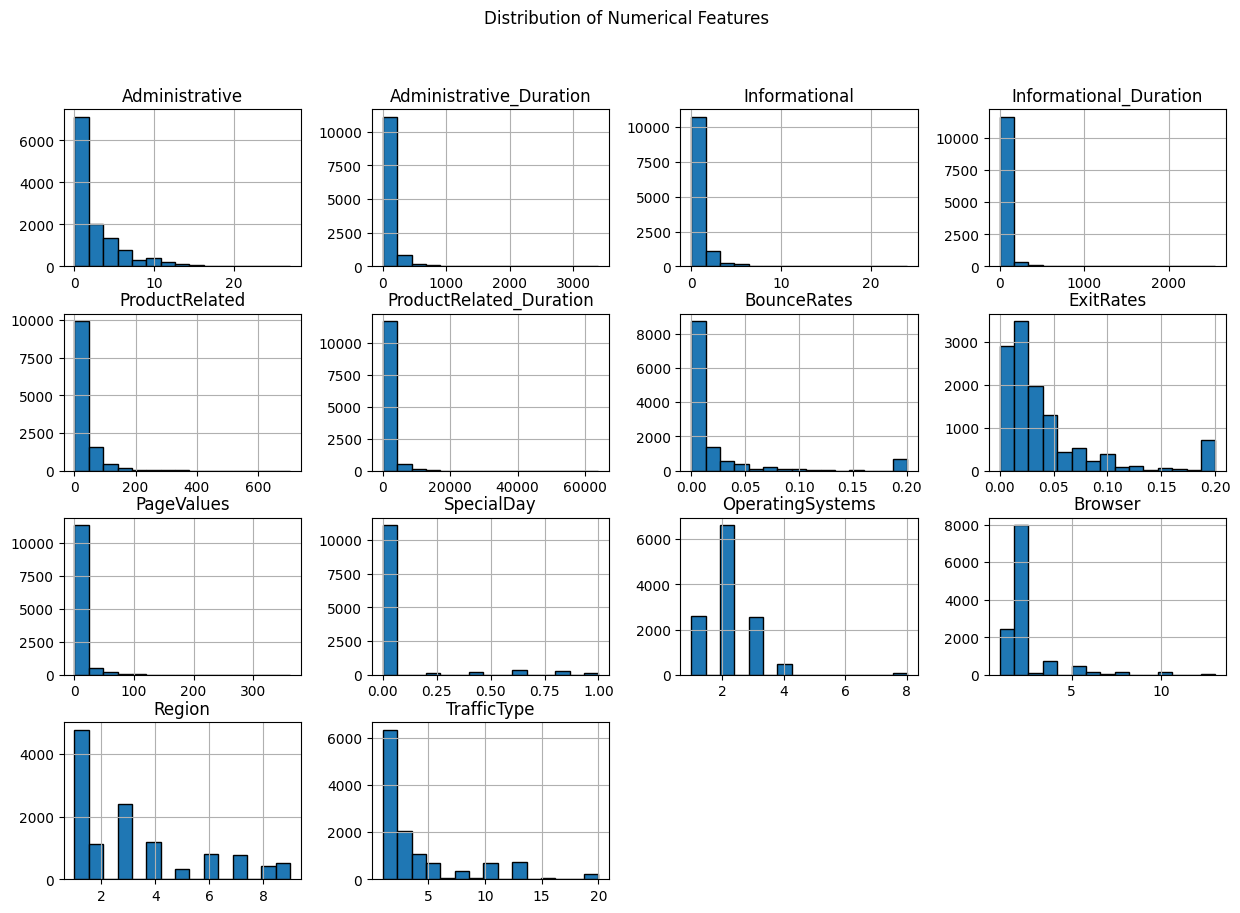

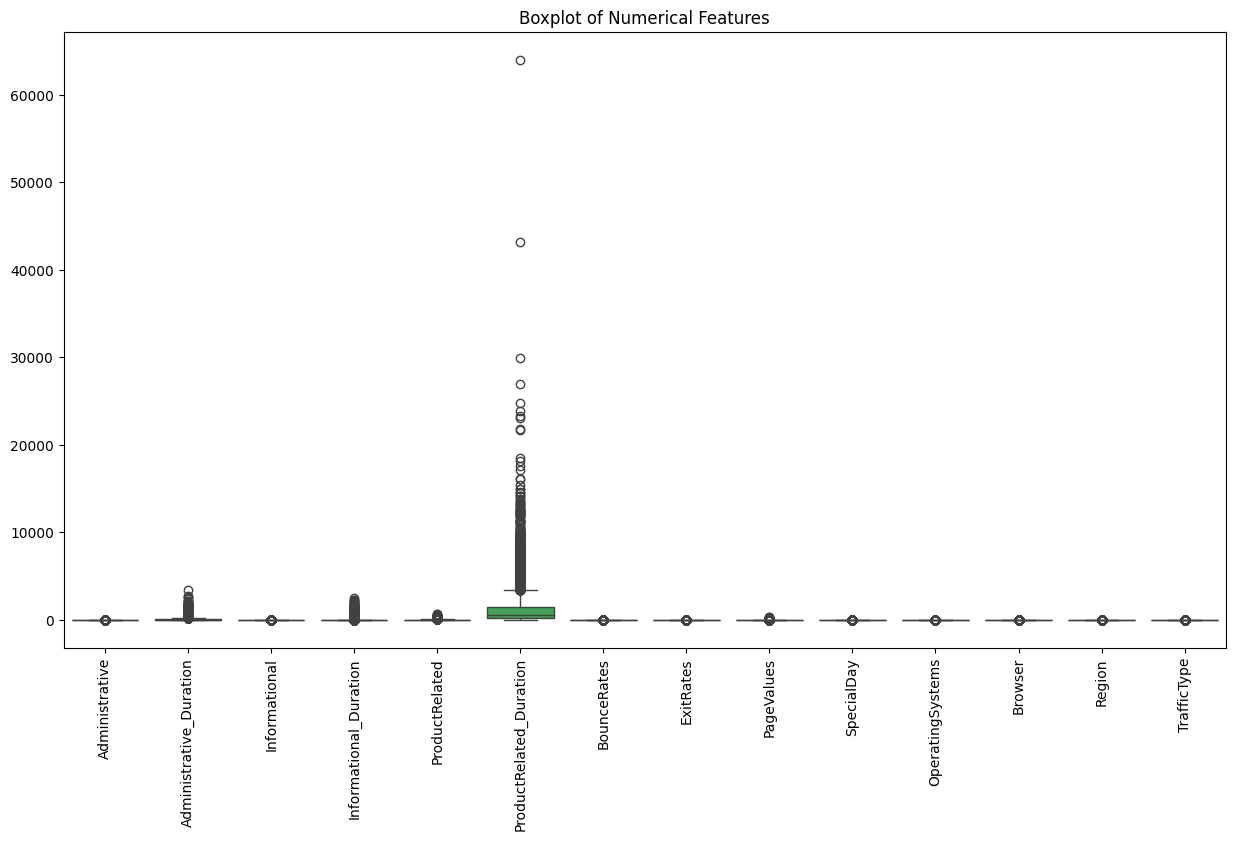

In [ ]:
# Plot histograms for numerical columns
data.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Boxplot for each numerical feature to check for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=data.drop(['Revenue', 'Weekend'], axis=1))
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

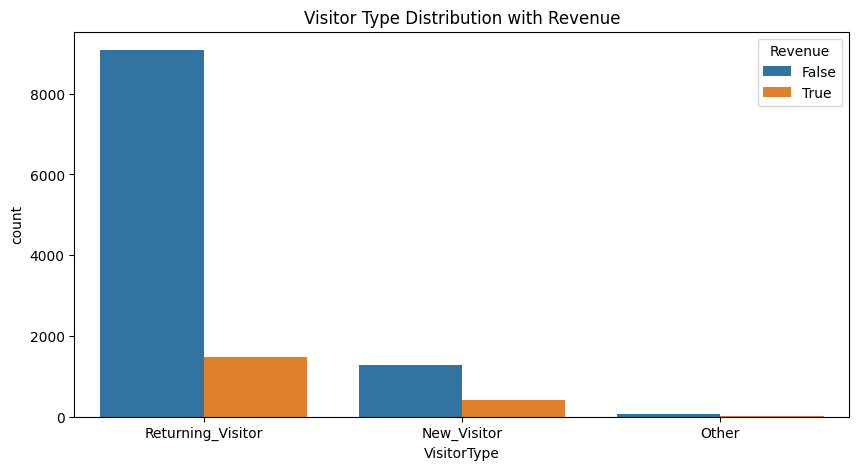

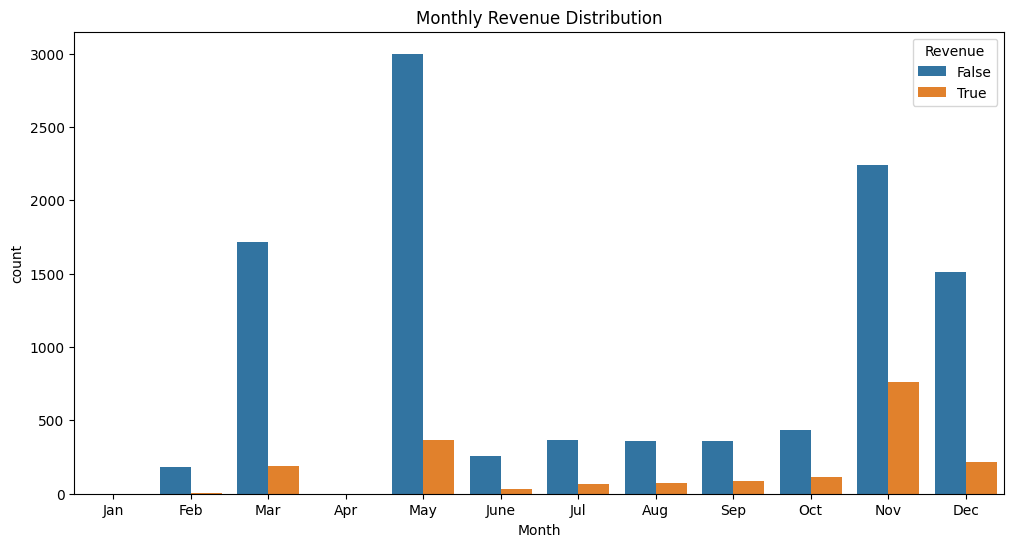

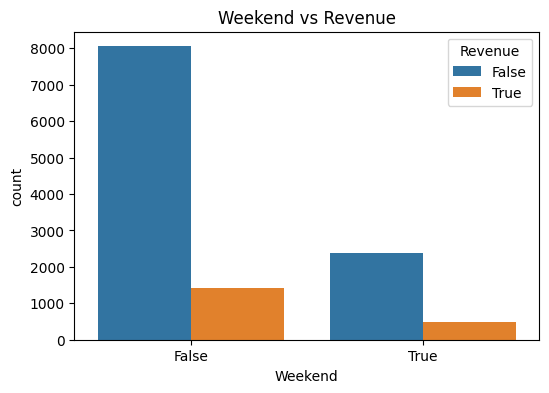

In [ ]:
# Plotting count of VisitorType with respect to Revenue
plt.figure(figsize=(10, 5))
sns.countplot(x='VisitorType', hue='Revenue', data=data)
plt.title("Visitor Type Distribution with Revenue")
plt.show()

# Plotting Revenue by Month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Revenue', data=data, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Monthly Revenue Distribution")
plt.show()

# Plotting Weekend vs Revenue
plt.figure(figsize=(6, 4))
sns.countplot(x='Weekend', hue='Revenue', data=data)
plt.title("Weekend vs Revenue")
plt.show()

In [ ]:
# Converting categorical variables (Month, VisitorType) into dummy/one-hot encoded variables
data_encoded = pd.get_dummies(data, columns=['Month', 'VisitorType'], drop_first=True)

# Ensuring Weekend and Revenue are in integer format (some ML algorithms may require this)
data_encoded['Weekend'] = data_encoded['Weekend'].astype(int)
data_encoded['Revenue'] = data_encoded['Revenue'].astype(int)

# Summary statistics for numerical columns
print("Summary statistics:\n", data_encoded.describe())

Summary statistics:
        Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.

Correlation matrix                                Administrative  Administrative_Duration  \
Administrative                       1.000000                 0.601583   
Administrative_Duration              0.601583                 1.000000   
Informational                        0.376850                 0.302710   
Informational_Duration               0.255848                 0.238031   
ProductRelated                       0.431119                 0.289087   
ProductRelated_Duration              0.373939                 0.355422   
BounceRates                         -0.223563                -0.144170   
ExitRates                           -0.316483                -0.205798   
PageValues                           0.098990                 0.067608   
SpecialDay                          -0.094778                -0.073304   
OperatingSystems                    -0.006347                -0.007343   
Browser                             -0.025035                -0.015392   
Region             

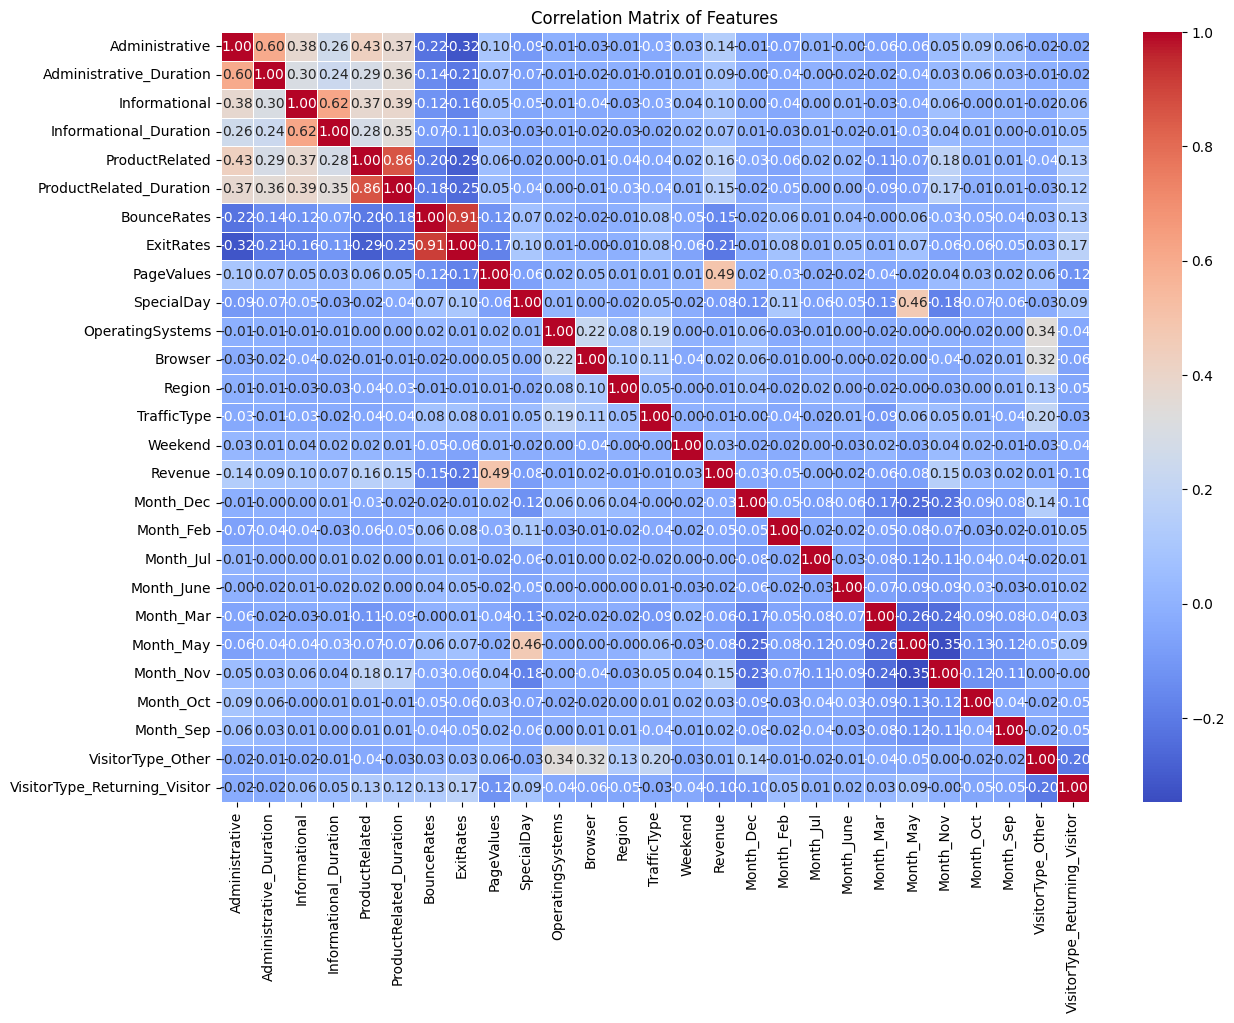

In [ ]:
# Computing correlation matrix
correlation_matrix = data_encoded.corr()
print("Correlation matrix", data_encoded.corr())

# Plotting heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

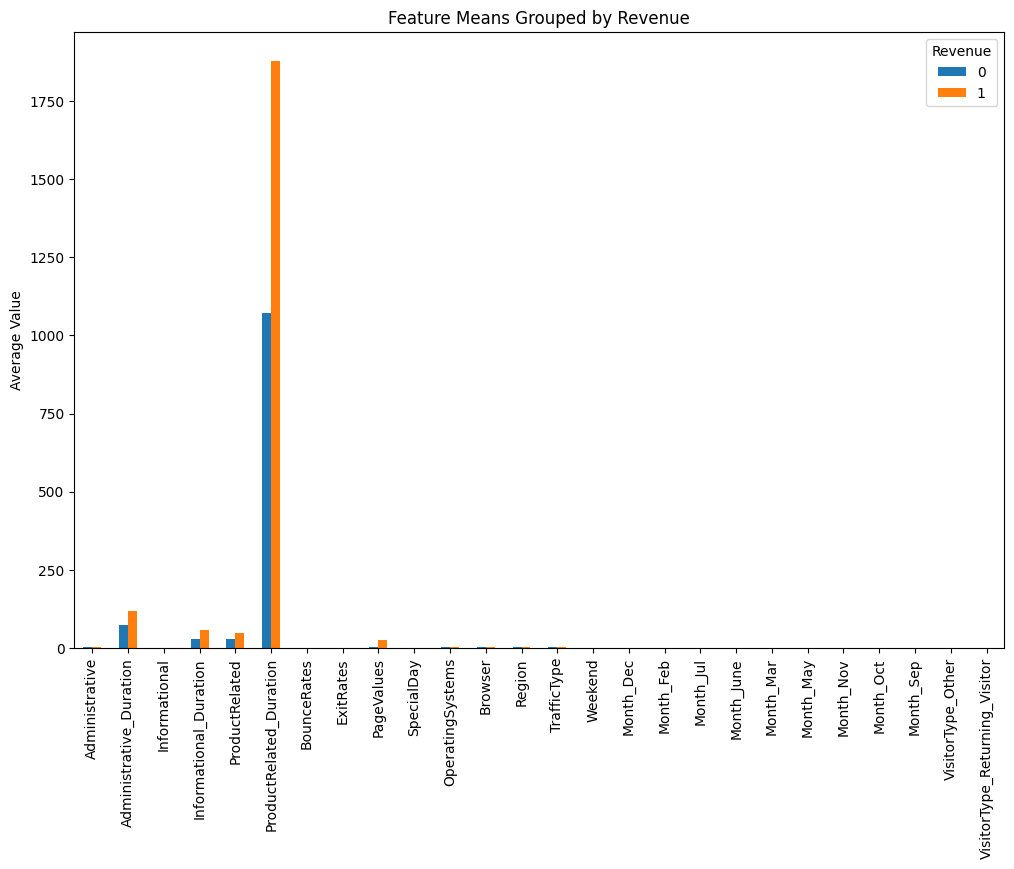

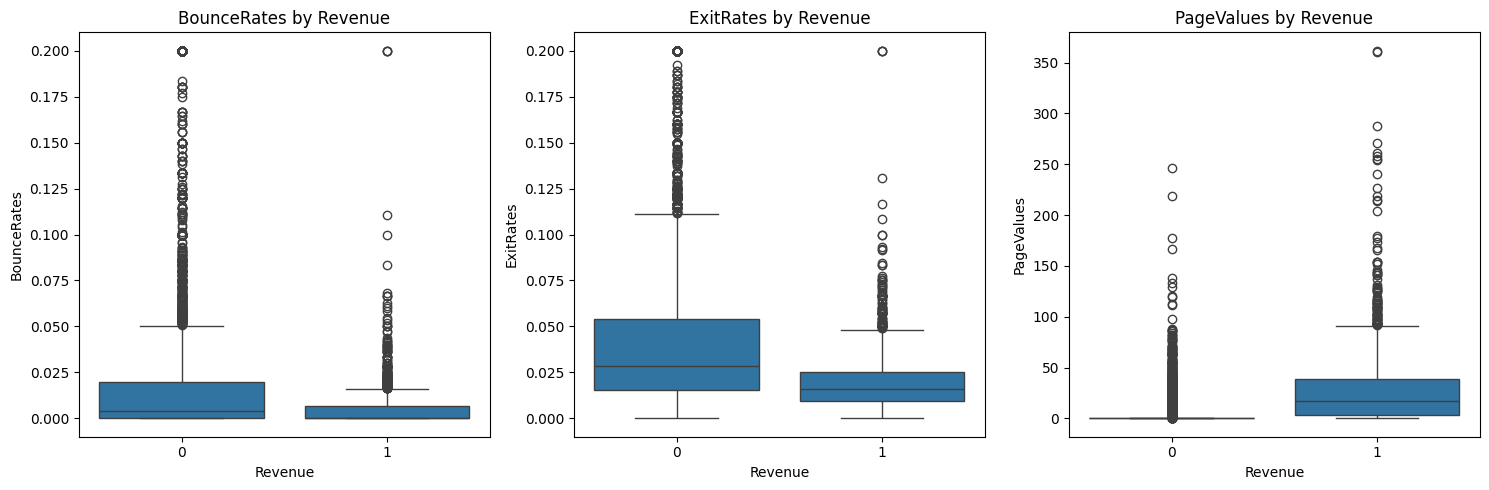

In [ ]:
# Revenue Analysis

# Average values of numerical features grouped by Revenue
revenue_analysis = data_encoded.groupby('Revenue').mean()

# Plotting grouped means
revenue_analysis.T.plot(kind='bar', figsize=(12, 8), title="Feature Means Grouped by Revenue")
plt.ylabel("Average Value")
plt.show()

# Examining BounceRates, ExitRates, PageValues based on Revenue
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Revenue', y='BounceRates', data=data_encoded)
plt.title("BounceRates by Revenue")

plt.subplot(1, 3, 2)
sns.boxplot(x='Revenue', y='ExitRates', data=data_encoded)
plt.title("ExitRates by Revenue")

plt.subplot(1, 3, 3)
sns.boxplot(x='Revenue', y='PageValues', data=data_encoded)
plt.title("PageValues by Revenue")
plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

# Apply to specific columns with outliers (e.g., 'BounceRates', 'ExitRates')
data = remove_outliers_iqr(data_encoded, 'BounceRates')
data = remove_outliers_iqr(data, 'ExitRates') # Fixed: Using 'data' instead of 'data_cleaned' for consistency

In [ ]:
# Dropping target variable for clustering and scale the features
X_cluster = data.drop('Revenue', axis=1)

# Check if 'Month' and 'VisitorType' columns exist in X_cluster
if 'Month' not in X_cluster.columns or 'VisitorType' not in X_cluster.columns:
    print("Warning: 'Month' or 'VisitorType' columns not found in X_cluster. These columns will be skipped during one-hot encoding.")
    # Instead of failing, proceed without encoding these columns
    columns_to_encode = [col for col in ['Month', 'VisitorType'] if col in X_cluster.columns]
    if columns_to_encode:  # Check if there are any columns left to encode
        X_cluster = pd.get_dummies(X_cluster, columns=columns_to_encode, drop_first=True)
else:
    # If both columns are present, proceed as before
    X_cluster = pd.get_dummies(X_cluster, columns=['Month', 'VisitorType'], drop_first=True)

X_cluster['Weekend'] = X_cluster['Weekend'].astype(int)

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Optionally, reduce dimensions using PCA for better clustering performance
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

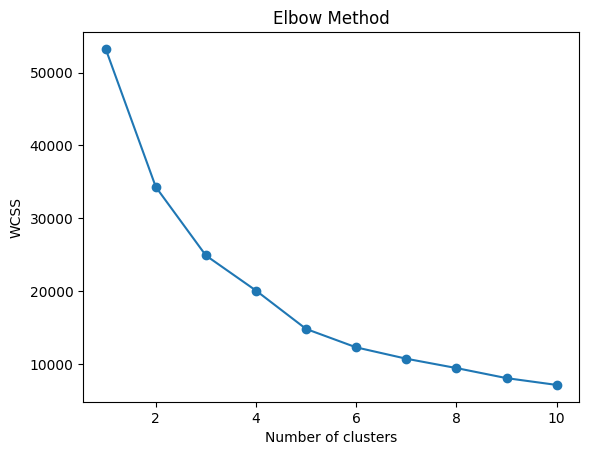

In [ ]:
# Determine optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [ ]:
# Fitting KMeans with the chosen number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Instead of directly assigning to data_encoded, create a new column in 'data'
# and then merge it back into data_encoded based on a common index.
data['Cluster'] = clusters

# Assuming 'data' and 'data_encoded' share a common index (e.g., original row numbers),
# merge 'Cluster' column from 'data' into 'data_encoded'.
data_encoded = data_encoded.merge(data[['Cluster']], left_index=True, right_index=True, how='left')

# Now, data_encoded will have the 'Cluster' column with assigned cluster labels,
# and rows not present in 'data' (outliers) will have NaN values in 'Cluster'.
# You can handle these NaN values as needed (e.g., fill with a separate cluster label).

In [ ]:
# Calculating silhouette score
sil_score = silhouette_score(X_pca, clusters)
sil_score

0.3581619305939795

In [ ]:
# Displaying the average values of features for each cluster
# Selecting only numerical features for calculating the mean
numerical_features = data_encoded.select_dtypes(include=np.number).columns
cluster_analysis = data_encoded.groupby('Cluster')[numerical_features].mean()
cluster_analysis

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Cluster
Cluster,,,,,,,,,,,,,,,,,
0.0,7.439655,308.691460,2.556753,223.788329,107.622845,4270.507389,0.005814,0.018673,9.080951,0.023420,2.076149,2.134339,2.759339,3.550287,0.268678,0.297414,0.0
1.0,2.644492,83.863961,0.307775,13.165051,27.222894,982.020671,0.002045,0.016909,10.707823,0.002592,2.247732,2.669978,3.454860,4.309935,0.258531,0.236501,1.0
2.0,1.267039,36.057065,0.246569,9.589190,23.802047,883.511270,0.010898,0.035758,2.270402,0.113608,1.981158,2.115608,3.003489,3.602698,0.217725,0.085834,2.0


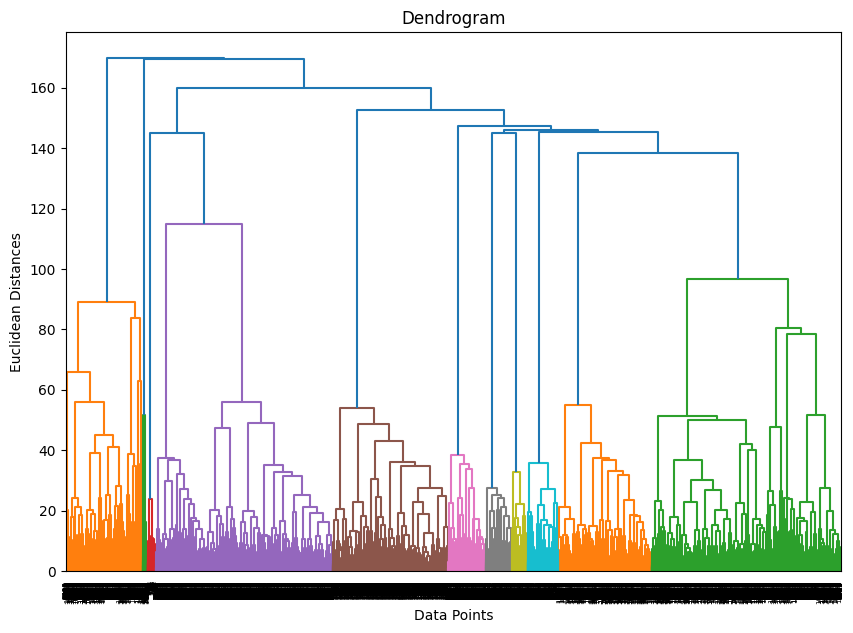

In [ ]:
# Plotting dendrogram to determine optimal clusters
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distances")
plt.show()

# Applying Hierarchical Clustering with chosen number of clusters
hier_clust = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = hier_clust.fit_predict(X_scaled)

cluster_df = pd.DataFrame(clusters, columns=['Cluster'], index=data.index) # Use data.index for alignment

# Adding cluster labels to the data_encoded by merging on index
data_encoded = data_encoded.merge(cluster_df, left_index=True, right_index=True, how='left')
# Rows in data_encoded not present in cluster_df will have NaN in 'Cluster'

In [ ]:
# Reducing dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Applying KMeans on reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
pca_clusters = kmeans.fit_predict(X_pca)

# Instead of directly assigning, create a temporary DataFrame with the cluster labels
cluster_df = pd.DataFrame({'Cluster': pca_clusters}, index=data.index[:len(pca_clusters)])

# Merge the cluster labels into data_encoded based on the shared index
data_encoded = data_encoded.merge(cluster_df, left_index=True, right_index=True, how='left')

# Rows in data_encoded not present in cluster_df will have NaN in 'Cluster'
# You can handle these NaN values as needed (e.g., fill with a separate cluster label)

In [ ]:
# Assuming you have already performed PCA and have X_pca
kmeans = KMeans(n_clusters=3, random_state=42)  # Initialize KMeans with desired parameters
clusters = kmeans.fit_predict(X_pca)  # Fit and predict on the PCA-transformed data

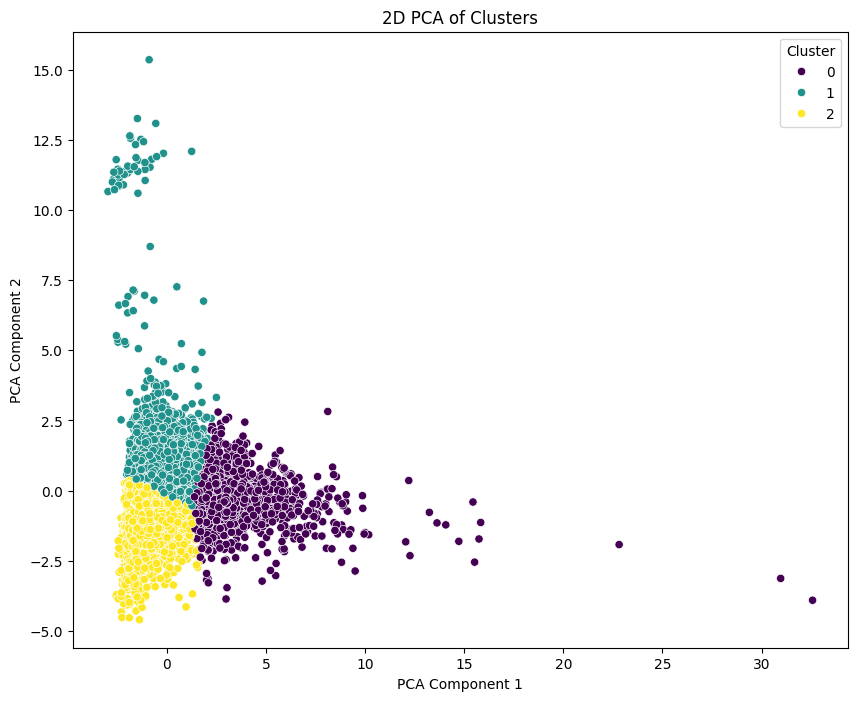

In [ ]:
# Assuming you have performed PCA and have X_pca, and 'clusters' contains the cluster assignments
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')  # Use X_pca for plotting
plt.title("2D PCA of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [ ]:
# Calculating mean values for each feature grouped by clusters
cluster_summary = data_encoded.groupby('Cluster').mean()
print(cluster_summary)

         Administrative  Administrative_Duration  Informational  \
Cluster                                                           
0.0            7.439655               308.691460       2.556753   
1.0            2.644492                83.863961       0.307775   
2.0            1.267039                36.057065       0.246569   

         Informational_Duration  ProductRelated  ProductRelated_Duration  \
Cluster                                                                    
0.0                  223.788329      107.622845              4270.507389   
1.0                   13.165051       27.222894               982.020671   
2.0                    9.589190       23.802047               883.511270   

         BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_June  \
Cluster                                                  ...               
0.0         0.005814   0.018673    9.080951    0.023420  ...    0.020115   
1.0         0.002045   0.016909   10.707823    0.002592

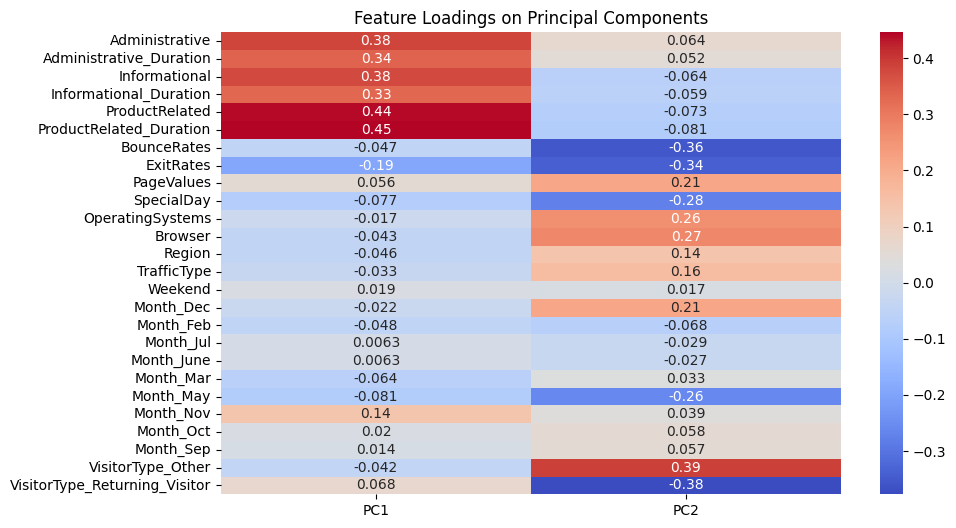

In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X_cluster.columns)
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title("Feature Loadings on Principal Components")
plt.show()

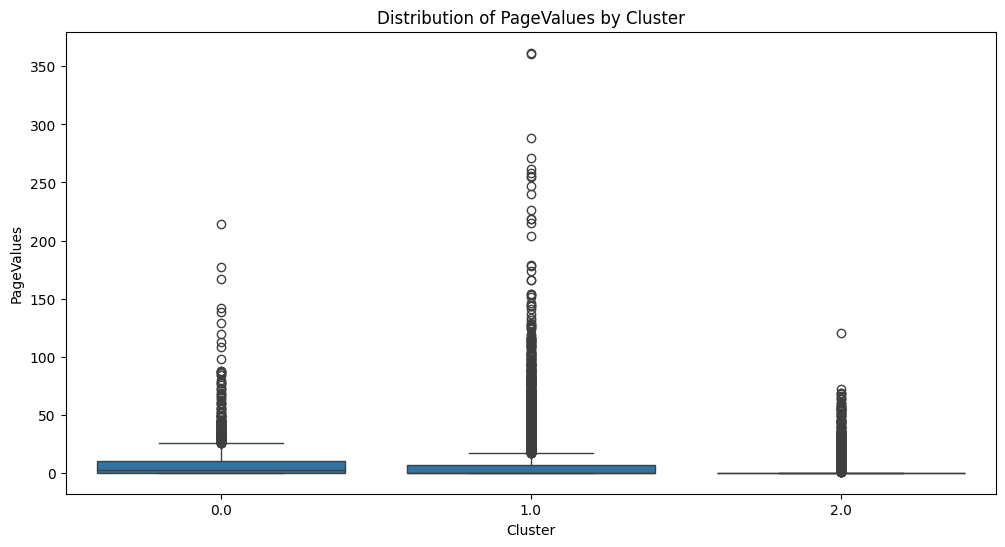

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='PageValues', data=data_encoded)  # Example for 'PageValues' feature
plt.title("Distribution of PageValues by Cluster")
plt.show()

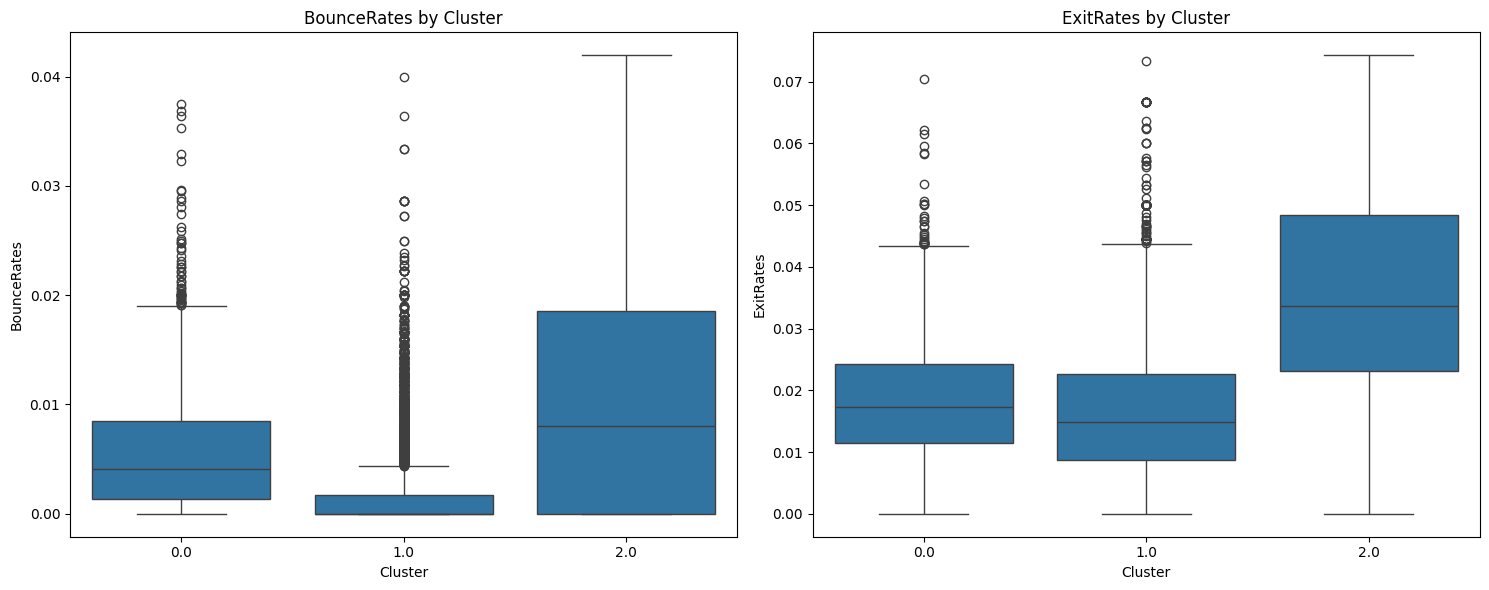

In [ ]:
# Plotting BounceRates and ExitRates by cluster
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='BounceRates', data=data_encoded)
plt.title("BounceRates by Cluster")

plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='ExitRates', data=data_encoded)
plt.title("ExitRates by Cluster")

plt.tight_layout()
plt.show()


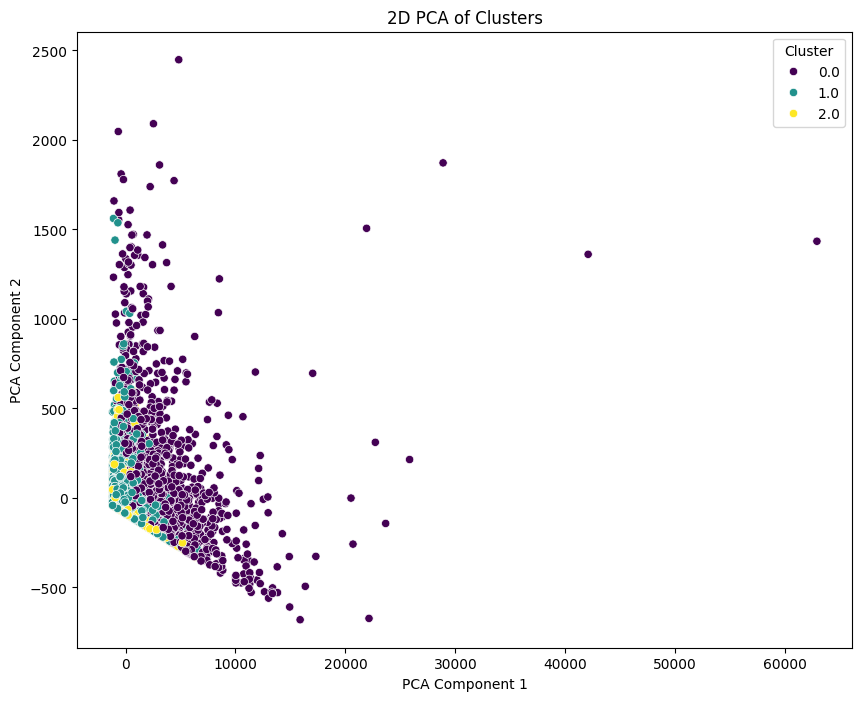

In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Create an imputer to replace NaN with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your data and transform it
data_imputed = pd.DataFrame(imputer.fit_transform(data_encoded.drop(columns=['Cluster', 'Revenue'])), columns=data_encoded.drop(columns=['Cluster', 'Revenue']).columns)

# Now apply PCA to the imputed data
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_imputed)

# Continue with your plotting code
plt.figure(figsize=(10, 8))
# Access the 'Cluster' column from the original data_encoded DataFrame
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data_encoded['Cluster'], palette='viridis')
plt.title("2D PCA of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()